### STEPS
* Camera Calibration
* Distortion Correction
* Color & Gradient Threshold
* Perspective Transform
* Find the lines
    * Sliding window search
    * Measuring the curvature

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

In [3]:
objp = np.zeros((6 * 9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = [] # 3d objects in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find the chessboard color
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        # cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        # cv2.imshow('img', img)
        # cv2.waitKey(500)

# cv2.destroyAllWindows()

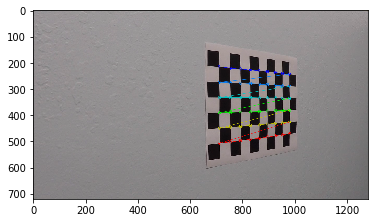

In [4]:
cv2.drawChessboardCorners(img, (9, 6), corners, ret)
plt.imshow(img)
plt.show()

Text(0.5,1,'Undistorted Image')

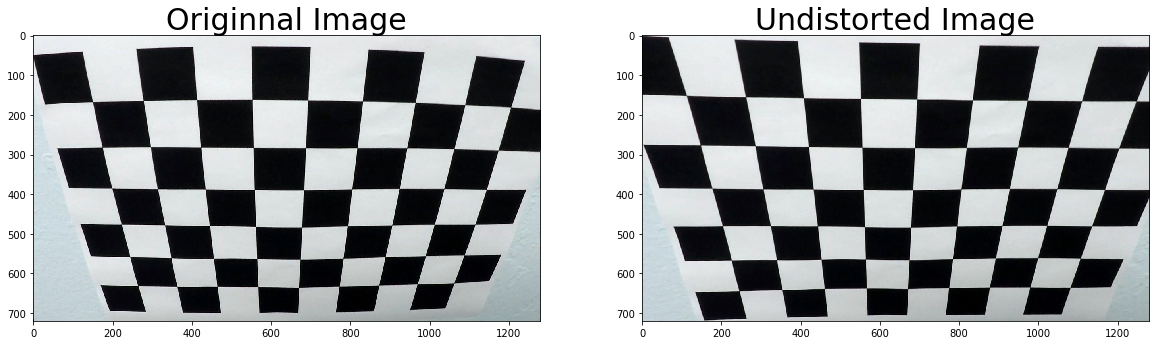

In [7]:
# calibration test
test_img = cv2.imread('camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# start calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
undst_img = cv2.undistort(test_img, mtx, dist, None, mtx)

# visualize the undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(test_img)
ax1.set_title('Originnal Image', fontsize=30)
ax2.imshow(undst_img)
ax2.set_title('Undistorted Image', fontsize=30)

In [8]:
import pickle
# save the model
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle, open('models/calibration_params.p', 'wb'))

In [17]:
a.T.shape

(6, 8, 2)